# importing libraries

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# loading data

In [4]:
df = pd.read_csv("insurance.csv")

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# feature engineering

In [8]:
Male = pd.get_dummies(df["sex"], drop_first = True)
df = pd.concat([df, Male], axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,True
4,32,male,28.880,0,no,northwest,3866.85520,True


In [9]:
Smoker = pd.get_dummies(df["smoker"], drop_first=True)
df = pd.concat([df, Smoker], axis = 1)
df = df.rename(columns={"yes" : "Smoker"})
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [10]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
Region = pd.get_dummies(df["region"], drop_first=True)
df = pd.concat([df, Region], axis = 1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,False,True,False,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False,False,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False,False,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False,True,False,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False,True,False,False


# Exploratory analysis

In [12]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2176\1648074749.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "sex", data = df, palette = "GnBu")


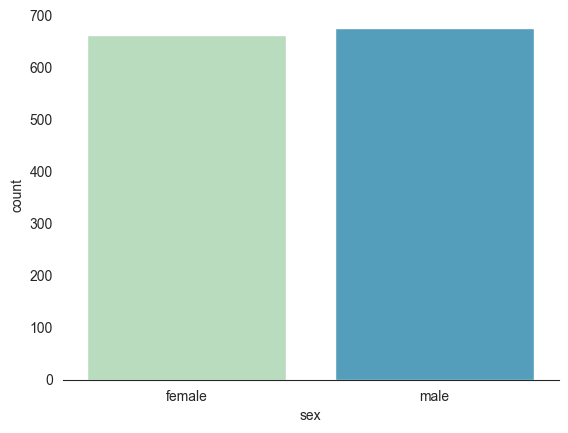

In [13]:
import seaborn as sns
sns.set_style("white")
sns.countplot(x = "sex", data = df, palette = "GnBu")
sns.despine(left  = True)

### relationship of smoking and gender to charges

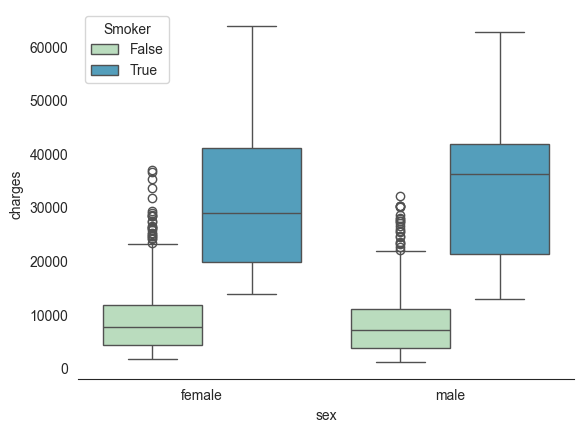

In [14]:
import seaborn as sns
sns.set_style("white")
sns.boxplot(x = "sex", y = "charges", data = df, palette = "GnBu", hue = "Smoker")
sns.despine(left  = True)

<Axes: xlabel='age', ylabel='charges'>

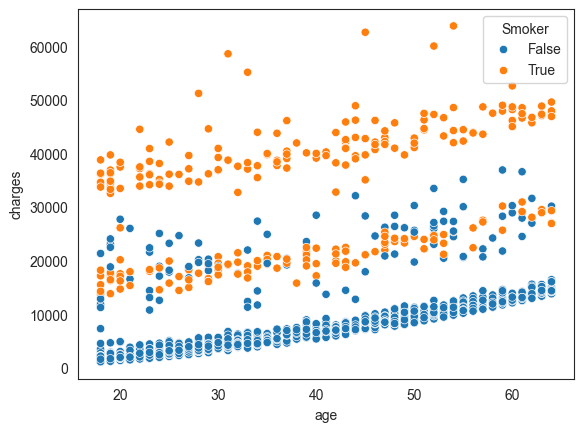

In [15]:
sns.scatterplot(x = "age", y = "charges", data = df, hue = "Smoker")

<Axes: xlabel='age', ylabel='charges'>

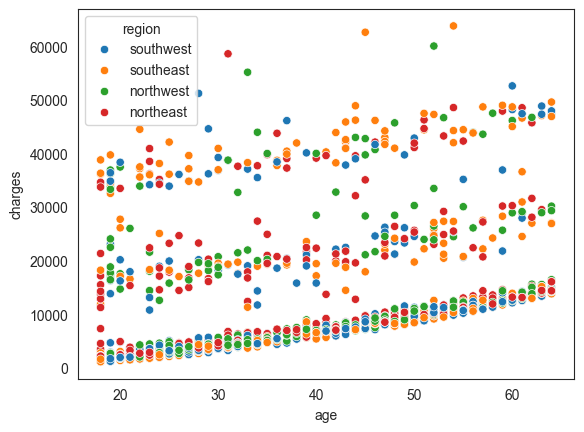

In [16]:
sns.scatterplot(x = "age", y = "charges", data = df, hue = "region")

<Axes: xlabel='bmi', ylabel='charges'>

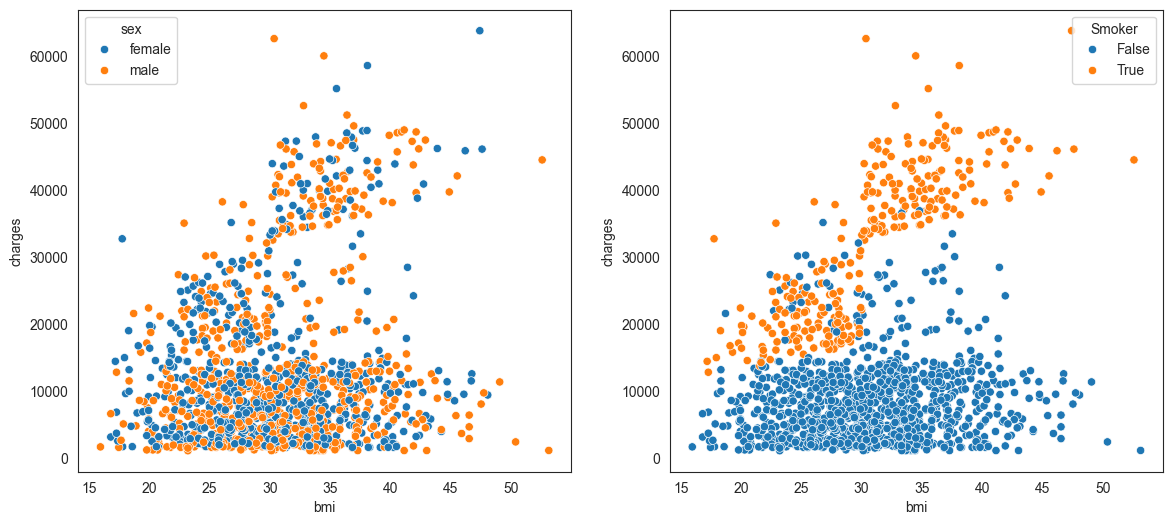

In [17]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 6))
sns.scatterplot(x = "bmi", y = "charges", data = df, hue = "Smoker", ax = ax[1])
sns.scatterplot(x = "bmi", y = "charges", data = df, hue = "sex", ax = ax[0])

In [18]:
df.drop(["sex", "region", "smoker"], axis = 1, inplace = True)

In [19]:
df.head()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


<Axes: >

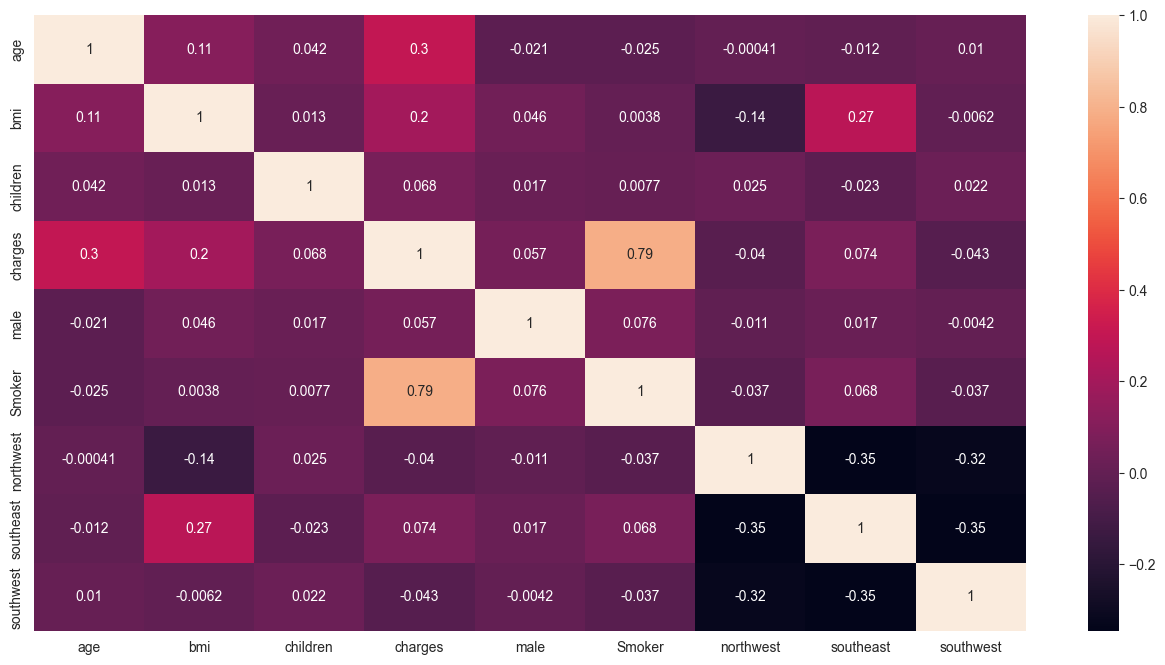

In [20]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True)

In [21]:
df.corr()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
Smoker,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


## splitting  the data

In [22]:
x = df.drop("charges", axis = 1)
y = df["charges"]

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [24]:
x_train.shape

(802, 8)

In [25]:
x_test.shape

(536, 8)

In [26]:
df.head()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


# scaling the data

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

# Support Vector Regression Model

In [29]:
from sklearn.svm import SVR

regressor = SVR()
regressor.fit(scaled_x_train, y_train)

SVR()

In [30]:
predict = regressor.predict(scaled_x_test)

In [31]:
predict.shape

(536,)

In [32]:
y_test.shape

(536,)

In [42]:
predict[:10]

array([9407.71300244, 9356.42320238, 9363.07633666, 9335.99189186,
       9340.59895645, 9334.65572884, 9401.99320204, 9384.98327282,
       9406.36383914, 9345.74754607])

In [40]:
y_test[:10]

1053    25309.48900
643      4466.62140
929      6289.75490
802      2103.08000
1025     2020.17700
487      1253.93600
609     39241.44200
568     11552.90400
461     22144.03200
788      5209.57885
Name: charges, dtype: float64